## **Logistic regression** 
is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the **sigmoid function** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an **S-shaped** curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

### **1 / (1 + e^-value)**

Where **e** is the base of the natural logarithms **(Euler’s number or the EXP() function in your spreadsheet)** and value is the actual numerical value that you want to transform. Below is a plot of the numbers between -5 and 5 transformed into the range 0 and 1 using the logistic function.


![alt text](https://cdn-images-1.medium.com/max/1024/0*CZJ5hnAavQMN0nV9.png)

here you will notice that the value mentioned in the above equation for logistic function is nothing but **5x and 10x**.

Now that we know what the logistic function is, let’s see how it is used in logistic regression.

In [1114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [1115]:
data=load_iris()

In [1116]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [1117]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [1118]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [1119]:
data.target_names,data.target

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [1120]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [1121]:
df["target_column"]=data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_column
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


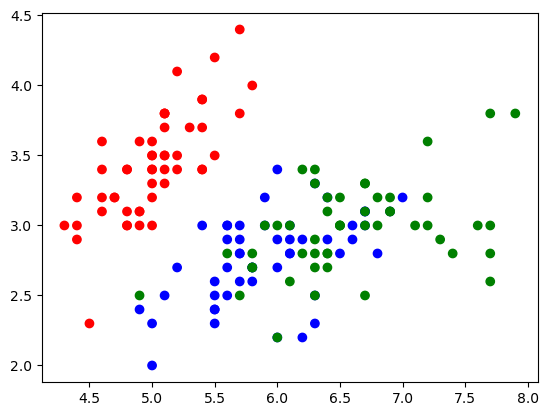

In [1122]:
import matplotlib
colour=["red","blue","green"]
plt.scatter(
    df["sepal length (cm)"].values,df["sepal width (cm)"].values,
    c=df.target_column.values,cmap=matplotlib.colors.ListedColormap(colour)
)

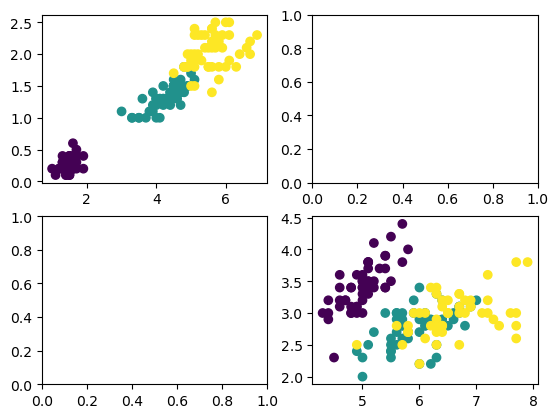

In [1123]:
fig,axes=plt.subplots(2,2)
axes[0][0].scatter(df["petal length (cm)"], df["petal width (cm)"],c=df.target_column)
axes[1][1].scatter(df["sepal length (cm)"], df["sepal width (cm)"],c=df.target_column)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

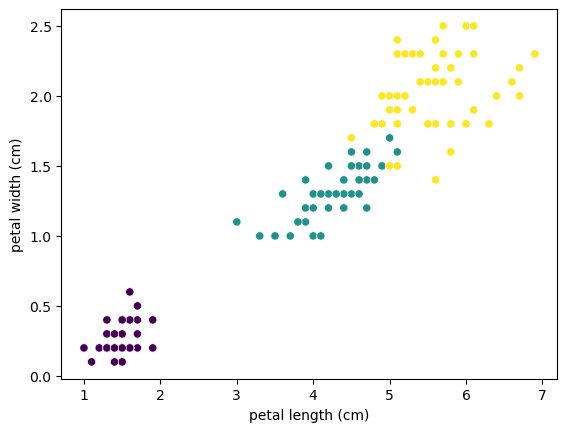

In [1124]:
sns.scatterplot(x="petal length (cm)",y="petal width (cm)",c=df.target_column,data=df)

In [1125]:
data=df.sample(frac=1.0)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_column
90,5.5,2.6,4.4,1.2,1
46,5.1,3.8,1.6,0.2,0
111,6.4,2.7,5.3,1.9,2
132,6.4,2.8,5.6,2.2,2
101,5.8,2.7,5.1,1.9,2


In [1126]:
data.target_column==2

90     False
46     False
111     True
132     True
101     True
       ...  
142     True
53     False
13     False
97     False
133     True
Name: target_column, Length: 150, dtype: bool

In [1127]:
# here we can take 2 and 3 both the columns,
#2 columns gives more misclassification as compared to 3 
#this when data sample is shuffled in the similar manner all the time 
x=data.iloc[:,2:3].values
y=(data.target_column==2).astype(np.float32).values

In [1128]:
x.flatten(),y

(array([4.4, 1.6, 5.3, 5.6, 5.1, 5.1, 4.7, 3.7, 6.7, 4.5, 1.7, 4.8, 1.5,
        1.7, 4.9, 3.3, 4.8, 5.4, 1.4, 4.5, 5.7, 5.6, 1.3, 5. , 1.9, 4.5,
        5.9, 1.3, 1.4, 1.5, 4. , 1.4, 5. , 6.1, 5.9, 1.4, 4.4, 6. , 4.5,
        5.8, 5.6, 5.2, 1.5, 4.1, 6.9, 3.9, 3.3, 1.4, 4.5, 6.1, 4.9, 1.7,
        5.1, 4.9, 5.5, 5.5, 5.8, 1.7, 4.8, 3.8, 1.3, 4.7, 3.5, 1.5, 5.6,
        1.5, 1.3, 4.7, 1.5, 1.6, 4.2, 1.5, 6.4, 1.5, 1.5, 6.1, 1.6, 5. ,
        1.2, 1. , 5.8, 1.3, 4.2, 4.7, 1.4, 4.8, 1.3, 4.2, 6.7, 6. , 1.6,
        5.7, 1.4, 4.1, 4.4, 3.9, 1.4, 1.9, 3.5, 5.4, 4.4, 1.2, 6.3, 1.6,
        5. , 5.1, 1.6, 1.5, 4.6, 5.1, 5.5, 1.4, 4.9, 3.6, 3.9, 4. , 4.5,
        4.7, 5.2, 4.6, 3. , 5.7, 4.1, 4.6, 1.4, 4.2, 1.4, 4. , 4.5, 5.6,
        4.3, 5.3, 4. , 6.6, 1.4, 4.5, 1.3, 4.9, 1.4, 1.5, 5.6, 1.5, 1.5,
        1.6, 5.1, 5.1, 4. , 1.1, 4.3, 5.1]),
 array([0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
        1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,


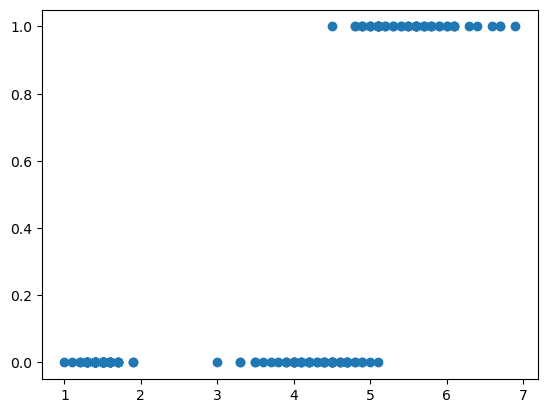

In [1129]:
plt.scatter(x,y)

In [1130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [1131]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()

In [1132]:
logr.fit(x_train,y_train)

LogisticRegression()

In [1133]:
y_pred=logr.predict(x_test)

In [1134]:
y_test,y_pred

(array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.], dtype=float32),
 array([0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

In [1135]:
(y_test==y_pred).sum()/len(y_test)

0.9333333333333333

In [1136]:
logr.classes_

array([0., 1.], dtype=float32)

In [1137]:
x_test.flatten()

array([1.7, 4.4, 1.4, 5.1, 3.3, 5.1, 6.7, 3. , 4.4, 1.4, 4.5, 5.6, 5.4,
       5.3, 4. , 6.3, 3.5, 1.6, 1.4, 4.4, 5.6, 5.5, 5.7, 4.6, 1.4, 4.7,
       1.2, 1.3, 4.8, 6.9])

In [1138]:
result=logr.predict_proba(x_test)

In [1139]:
result

array([[9.99973180e-01, 2.68198993e-05],
       [8.22883106e-01, 1.77116894e-01],
       [9.99990123e-01, 9.87725767e-06],
       [3.11133917e-01, 6.88866083e-01],
       [9.94506786e-01, 5.49321373e-03],
       [3.11133917e-01, 6.88866083e-01],
       [2.18832177e-03, 9.97811678e-01],
       [9.97969944e-01, 2.03005634e-03],
       [8.22883106e-01, 1.77116894e-01],
       [9.99990123e-01, 9.87725767e-06],
       [7.69063159e-01, 2.30936841e-01],
       [7.87320660e-02, 9.21267934e-01],
       [1.42613624e-01, 8.57386376e-01],
       [1.88348936e-01, 8.11651064e-01],
       [9.46236908e-01, 5.37630917e-02],
       [8.23961358e-03, 9.91760386e-01],
       [9.89363630e-01, 1.06363699e-02],
       [9.99980776e-01, 1.92243236e-05],
       [9.99990123e-01, 9.87725767e-06],
       [8.22883106e-01, 1.77116894e-01],
       [7.87320660e-02, 9.21267934e-01],
       [1.06526299e-01, 8.93473701e-01],
       [5.77212488e-02, 9.42278751e-01],
       [7.04756821e-01, 2.95243179e-01],
       [9.999901

In [1140]:
logr.intercept_

array([-16.18692116])

In [1141]:
logr.coef_

array([[3.32975385]])

In [1142]:
# 0th cloumn represent proba it does not belong to the class and 1st column represents the proba it belongs to the class
result[:5]

array([[9.99973180e-01, 2.68198993e-05],
       [8.22883106e-01, 1.77116894e-01],
       [9.99990123e-01, 9.87725767e-06],
       [3.11133917e-01, 6.88866083e-01],
       [9.94506786e-01, 5.49321373e-03]])

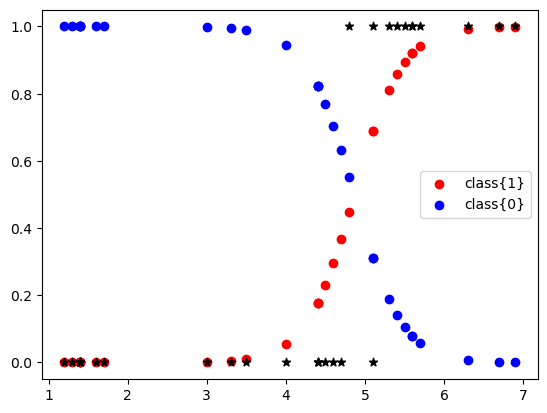

In [1187]:
plt.scatter(x_test,result[:,1],c="red",label="class{1}")
plt.scatter(x_test,result[:,0],c="blue",label="class{0}")
plt.scatter(x_test,y_test,marker="*",c="black")
plt.legend()

In [1146]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac=accuracy_score(y_test,y_pred)
ac

0.9333333333333333

In [1149]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[18,  1],
       [ 1, 10]], dtype=int64)

<Axes: >

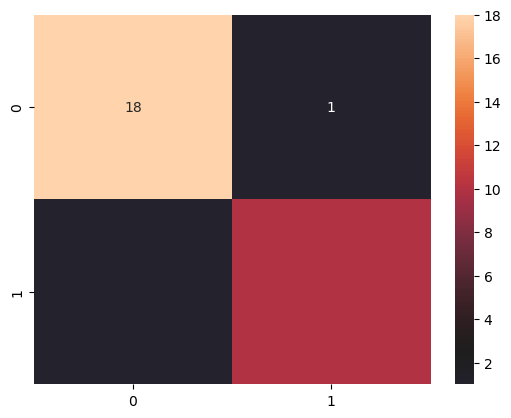

In [ ]:
sns.heatmap(data=cm,annot=True,cbar=True)

In [1182]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        19
         1.0       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

